In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv


# importing needed libraries


In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import category_encoders as ce

<hr>
# data preprocessing

# importing the dataset

In [163]:
dataset = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


# isolating the dependent variable ( selling price )

the 'Fuel_type' column is a categorical variable , where the category 'CNG' appears only twice
for simplicity , the records with 'Fuel_Type' == 'CNG are not considered  ( they are the 19th and 37th records)

In [164]:
y_data=dataset.iloc[:,[2]]
y=y_data.values

#removing cng cars
y=np.delete(y,[18,36],0)

#visual
y_data.head(10)

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


# isolating the feature matrix
and the categorical variables are one hot encoded

In [165]:
x_data = dataset.iloc[:,1:]

#encoding categorical variables

ohc_5 = ce.OneHotEncoder(cols=['Transmission','Seller_Type','Fuel_Type'])
x_data=ohc_5.fit_transform(x_data);
x_orig=x_data.values

#removing records with 'Fuel_Type' == 'CNG'
x_orig=np.delete(x_orig,[18,35],0)

#avoiding dummy variable trap
x_orig=np.delete(x_orig,[1,5,6,8,10],1)

#visual
x_data.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_1,Fuel_Type_2,Fuel_Type_3,Seller_Type_1,Seller_Type_2,Transmission_1,Transmission_2,Owner
0,2014,3.35,5.59,27000,1,0,0,1,0,1,0,0
1,2013,4.75,9.54,43000,0,1,0,1,0,1,0,0
2,2017,7.25,9.85,6900,1,0,0,1,0,1,0,0
3,2011,2.85,4.15,5200,1,0,0,1,0,1,0,0
4,2014,4.60,6.87,42450,0,1,0,1,0,1,0,0
5,2018,9.25,9.83,2071,0,1,0,1,0,1,0,0
6,2015,6.75,8.12,18796,1,0,0,1,0,1,0,0
7,2015,6.50,8.61,33429,0,1,0,1,0,1,0,0
8,2016,8.75,8.89,20273,0,1,0,1,0,1,0,0
9,2015,7.45,8.92,42367,0,1,0,1,0,1,0,0


 in the above table , columns : 6,7,9,11 are removed to avoid the dummy variable trap and  column : 2 removed as it is the dependent variable
                                 

# feature scaling 
here **standardization** is used to scale the feature matrix

In [166]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x_orig)

# adding the intercept term (aka bias term )
the intercept term will act as the constant in the hypothesis equation

In [167]:
[x_row,x_col]=x.shape
x=np.append(arr=np.ones((x_row,1)).astype(float),values=x,axis=1)

# splitting the training and test sets
here cross validation set is not used , since training set is small and regularization is not done

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

<h2>with this the data preprocessing is complete</h2>
<hr>


# here we are going to use 2 different models
<h2> <ul> <li> 1. defining the cost function and performing gradient descent manually </li>
    <li> 2. using a linear regression model from the scikit-learn library </li></ul> </h2>


# 1. Manually optimizing the cost function


# defining the cost function  (Mean Squared Error)  
<h3> parameters :</h3><ul><li> 'x' is the feature matrix </li>  <li>'y' is the dependent variable </li> <li> 'theta' is the parameter vector of the hypothesis</li></ul>
    <h3> return values :</h3><ul><li>'J' is the cost aka 'error' is returned</li></ul>

In [169]:
def cost(x,y,theta):
    [m,n]=x.shape
    h=np.dot(x,theta);
    J=(1/(2*m))*np.sum((h-y)**2)
    return J

# defining the gradient descent method (Batch gradient descent is used)
<h2>parameters : </h2> <ul><li> 'x' is the feature matrix </li>  <li>'y' is the dependent variable </li> <li> 'theta' is the parameter vector of the hypothesis</li><li>'iterations' is the number of iterations the gradient descent will run</li>  <li> 'alpha' is the learning rate     </li></ul>
<h2>return values : </h2><ul><li>'theta_opt' is the optimized theta</li>  <li>'grad_history' is the the array of gradients of each iteration</li>  <li>'J_history is the array of costs at each iteration</li></ul>

In [170]:
def gradient_descent(x,y,theta,iterations,alpha):
    [m,n]=x.shape
    theta_opt=theta
    J_history=np.zeros((iterations,1))
    grad_history=np.zeros((iterations,n))
    grad_history=grad_history.reshape(iterations,n)
    
    for i in range(iterations):
        h=np.dot(x,theta_opt);
        grad = (alpha/m)*(np.sum(((h-y)*x),axis=0))
        grad=grad.reshape(-1,1)
        theta_opt= theta_opt - grad
        J_history[i]=cost(x,y,theta_opt)
        grad_history[i]=theta_opt.transpose()
        
    return theta_opt,grad_history,J_history   

<h1>performing gradient descent</h1>
<ul><li>initially theta parameters are set randomly</li> <li> we use 1000 iterations </li><li> an alpha rate of 0.01</li></ul>

In [171]:
theta=np.random.randn(x_col+1,1)
iterations=1000

theta_opt,grad_history,J_history = gradient_descent(x_train,y_train,theta,iterations,0.01)

<h1>Evaluating the gradient descent algorithm </h1>
<p><h3> a graph is ploted with the x axis being the no of iterations and y axis being the cost error after that many iterations </h3></p> 
<p><h3> the cost is expected to decrease very rapidly in the beginning <br/> this rate of decrease in the cost is expected to slow down and later flatten out</h3></p>


Text(0, 0.5, 'cost')

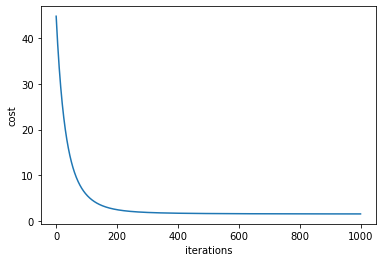

In [172]:
iter_plt=np.array([range(iterations)]).transpose()
plt.plot(iter_plt,J_history)
plt.xlabel('iterations')
plt.ylabel('cost')

<p><h2>behaviour of the plot is as expected , hence this confirms that gradient descent was implemented correctly </h2></p>
<hr>

# 2. Cost optimization using scikit learn library

<p><h2>the scikit learn libraries are imported <br/>an object of the linear regression class is made which acts as our multivariate linear regressor</h2></p>

In [173]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

<p><h2>the regressor is fit to the training set (this means the  model will learn from the training set )<br/>the predictions of the trained model on the test set are made</h2></p>

In [174]:
lr.fit(x_train,y_train)
y_pred_sk=lr.predict(x_test)
y_pred_sk=y_pred_sk.reshape(-1,1)

<hr>
# now we compare the performances of each of the models using their mean squared error as the evaluation metric

In [175]:
cost_SK=(1/(2*len(y)))*np.sum((y_pred_sk-y_test)**2)
cost_GD = cost(x_test,y_test,theta_opt)
print("the mean squared error of the sckikit learn model is ",cost_SK)
print("and the mean squared error of the cost of the model that was made manually is ",cost_GD)

the mean squared error of the sckikit learn model is  0.4164010522838817
and the mean squared error of the cost of the model that was made manually is  1.747471878450608


<p><h2>if we had more data , feature creation can be done to increase the variance of the model <br/>and this new  model can be trained on a larger dataset to balance the higher variance and this could lead to a more robust model.<br/>if variance is too high , regularization can be applied.<br/>that will be all :).</h2></p>   